In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# file paths and names

path_input = '/Users/srilakshmi/Desktop/Thesis/04-Data-Analysis-Results/01-TC-Assignment/Perc-Flooded-NRT/People/'
name_input_file = 'Perc_People_Flooded.csv'

path_shp = '/Users/srilakshmi/Desktop/Thesis/04-Data-Analysis-Results/00-Data-Sources/00-Cloud-to-Street/01-District-level/Districts-Shapefiles/216distboufinal-v2.shp'

path_output = '/Users/srilakshmi/Desktop/Thesis/04-Data-Analysis-Results/01-TC-Assignment/Perc-Flooded-NRT/People/perc_people_flooded_shp/'
name_output_file = 'perc_people_flooded.shp'


In [3]:
# load total population data
tot_pop = pd.read_csv(path_input+name_input_file, header=0)
tot_pop


Region  Perc Population Flooded
0    Abura / Asebu / Kwamankese                 0.001296
1              Accra Metropolis                 0.002028
2                      Ada East                 0.010217
3                      Ada West                 0.013472
4                        Adaklu                 0.000266
..                          ...                      ...
211                  West Gonja                 0.000662
212               West Mamprusi                 0.005232
213             Yendi Municipal                 0.008060
214                  Yilo Krobo                 0.000000
215                     Zabzugu                 0.002590

[216 rows x 2 columns]

In [4]:
# clean districts shapefile
ghana_dist = gpd.read_file(path_shp)
ghana_dist['DISTRICT'] = ghana_dist['DISTRICT'].str.title()


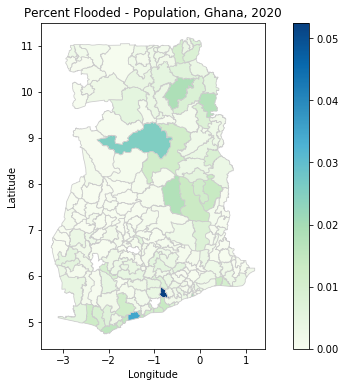

In [5]:
# map using geopandas
merged = ghana_dist.set_index('DISTRICT').join(tot_pop.set_index('Region'))
merged.index.name = 'DISTRICT'
merged.reset_index(inplace=True)

merged = merged.sort_values(by=['Perc Population Flooded'], ascending=False)

# set a variable that will call whatever column we want to visualise on the map
variable = 'Perc Population Flooded'
colorscale = 'GnBu'

# set the range for the choropleth
vmin, vmax = min(merged[variable]), max(merged[variable])

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
merged.plot(column=variable, cmap=colorscale, linewidth=0.8, ax=ax, edgecolor='0.8')
plt.title('Percent Flooded - Population, Ghana, 2020')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

sm = plt.cm.ScalarMappable(cmap=colorscale, norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)

plt.show()

# write to shapefile
merged.to_file(path_output+name_output_file)
